In [1]:
import numpy as np
import os
import random
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt


2023-12-21 11:59:40.627059: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 11:59:40.627177: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 11:59:40.629136: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 11:59:40.964543: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = "data/Images"

In [3]:
batch_size = 64 #pour optimiser l'utilisation du GPU Kaggle 
img_height = 128
img_width = 128
num_classes = 62

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 389765 files belonging to 26 classes.
Using 311812 files for training.


2023-12-21 12:00:12.315954: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4121 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 389765 files belonging to 26 classes.
Using 77953 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [7]:
classArr = []
classArr.extend([chr(i) for i in range(ord('A'), ord('Z')+1)])
print(classArr)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


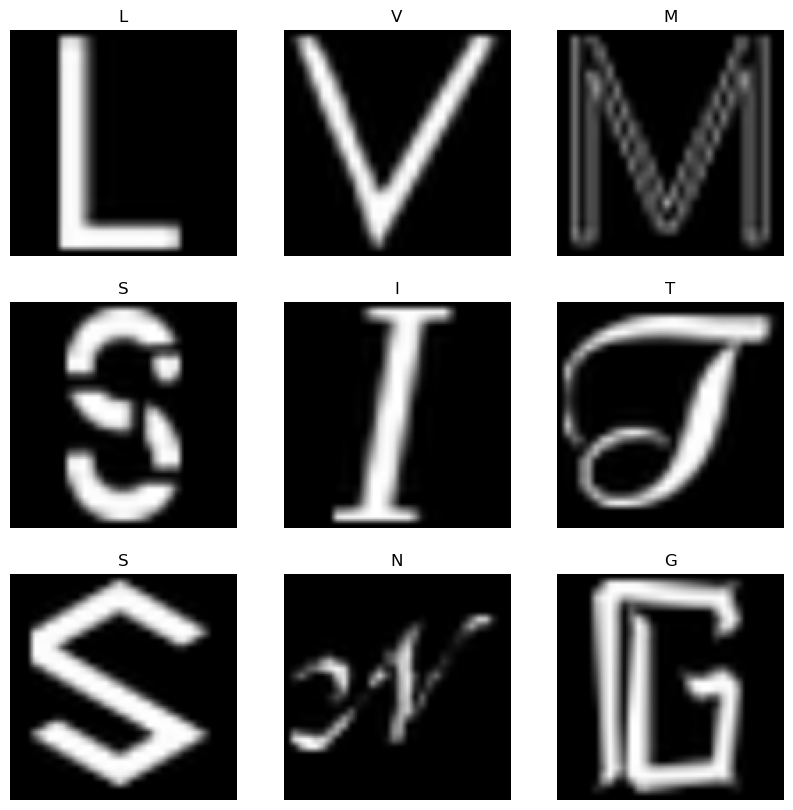

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classArr[labels[i]])
    plt.axis("off")

In [15]:


model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        #on veut une probabilité d'appartenance aux classes
  metrics=['accuracy'])


epochs = 15

In [16]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


2023-12-20 22:54:37.403643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-12-20 22:54:38.127114: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f12f80126d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-20 22:54:38.127148: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-12-20 22:54:38.139604: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-20 22:54:38.294802: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4873/4873 [==============================] - 106s 21ms/step - loss: 0.6901 - accuracy: 0.8210 - val_loss: 0.5631 - val_accuracy: 0.8512
Epoch 2/15
4873/4873 [==============================] - 98s 20ms/step - loss: 0.5014 - accuracy: 0.8661 - val_loss: 0.5074 - val_accuracy: 0.8654
Epoch 3/15
4873/4873 [==============================] - 98s 20ms/step - loss: 0.4214 - accuracy: 0.8852 - val_loss: 0.5104 - val_accuracy: 0.8699
Epoch 4/15
4873/4873 [==============================] - 99s 20ms/step - loss: 0.3630 - accuracy: 0.8991 - val_loss: 0.5259 - val_accuracy: 0.8693
Epoch 5/15
4873/4873 [==============================] - 99s 20ms/step - loss: 0.3170 - accuracy: 0.9108 - val_loss: 0.5714 - val_accuracy: 0.8690
Epoch 6/15
4873/4873 [==============================] - 99s 20ms/step - loss: 0.2812 - accuracy: 0.9201 - val_loss: 0.6369 - val_accuracy: 0.8690
Epoch 7/15
4873/4873 [==============================] - 99s 20ms/step - loss: 0.2533 - accuracy: 0.9266 - val_loss: 0.6678 - val_accur

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9

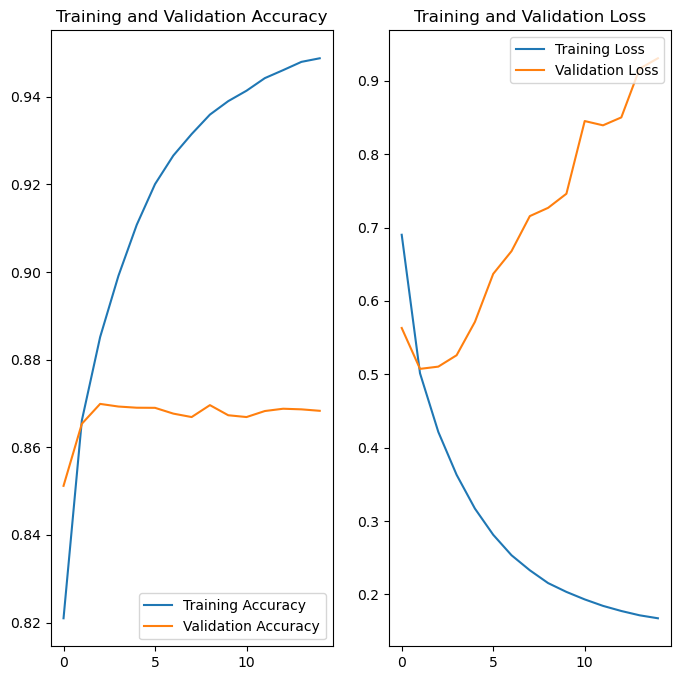

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomRotation(0.02, fill_mode='constant',fill_value=255.0),
    tf.keras.layers.RandomZoom(height_factor=0.1,width_factor=0.1,fill_mode='constant',fill_value=255.0),
  ]
)

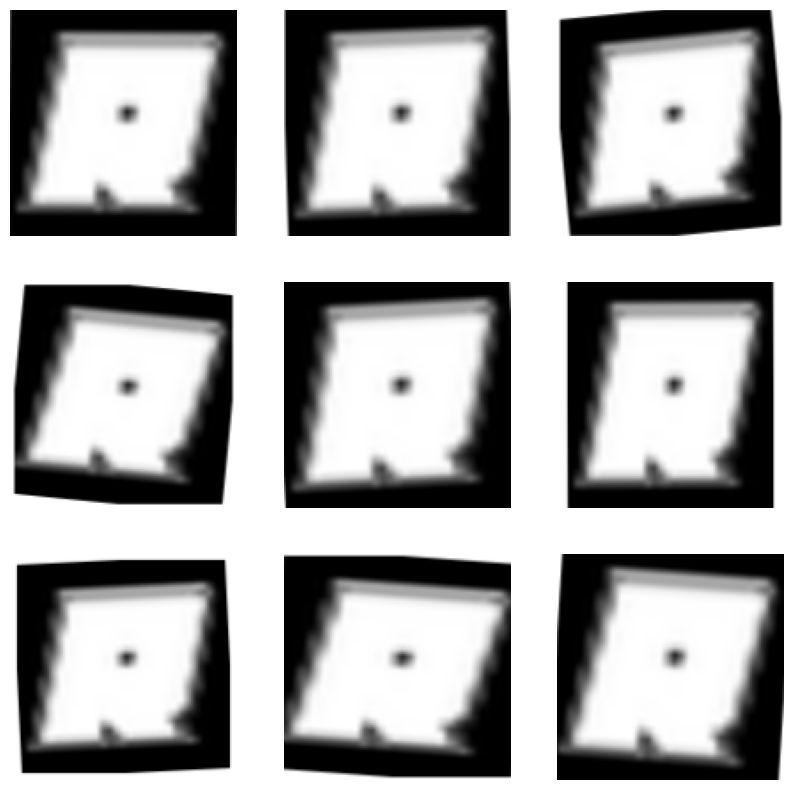

In [10]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [12]:
model_aug = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2), #on ajoute également un layer de dropout
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [13]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
epochs = 15
history = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


2023-12-21 12:05:43.579846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-12-21 12:05:45.625974: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8f88015d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-21 12:05:45.626026: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-12-21 12:05:45.639450: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-21 12:05:45.851822: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4873/4873 [==============================] - 111s 21ms/step - loss: 0.7383 - accuracy: 0.8077 - val_loss: 0.5610 - val_accuracy: 0.8523
Epoch 2/15
4873/4873 [==============================] - 103s 21ms/step - loss: 0.5606 - accuracy: 0.8507 - val_loss: 0.5201 - val_accuracy: 0.8621
Epoch 3/15
4873/4873 [==============================] - 103s 21ms/step - loss: 0.5075 - accuracy: 0.8626 - val_loss: 0.4840 - val_accuracy: 0.8713
Epoch 4/15
4873/4873 [==============================] - 102s 21ms/step - loss: 0.4752 - accuracy: 0.8706 - val_loss: 0.4666 - val_accuracy: 0.8752
Epoch 5/15
4873/4873 [==============================] - 102s 21ms/step - loss: 0.4528 - accuracy: 0.8759 - val_loss: 0.4515 - val_accuracy: 0.8791
Epoch 6/15
4873/4873 [==============================] - 103s 21ms/step - loss: 0.4360 - accuracy: 0.8801 - val_loss: 0.4463 - val_accuracy: 0.8821
Epoch 7/15
4873/4873 [==============================] - 104s 21ms/step - loss: 0.4225 - accuracy: 0.8832 - val_loss: 0.4430 - val

In [15]:
# save model and architecture to single file
model_aug.save("model_aug.h5")

/home/msi/miniconda3/envs/tf_cuda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
